In [2]:
%load_ext autoreload
%autoreload 2

import functions_master as fm
import pandas as pd

## Defining Key Constrains on the dataset

The main constrains on the data are:

1. Metric - the raw dataset has prices at three points in the day: Open, High, and Close
2. Start and End Dates

In [3]:
metric = 'Close'

start_date = '2019-01-01'
end_date =  '2021-12-31'

raw_data = pd.read_csv("data/export.csv", parse_dates=True)
returns = fm.get_returns(raw_data)

## Obtaining Key Metrics

The first step is to obtain the measures such as Volatility, Annualized Volatility, Return per Month, and Annualized Return for all the companies within the dataset within the specified time frame and rank them.

Semideviation is volatility of the subset of returns that are negative.

In [4]:
key_stats = (fm.get_stats (returns, metric, start_date, end_date)
             [['CompanyName', 'PeriodStart', 'PeriodEnd', 'MonthsInPeriod', 'Volatility', 'Semideviation', 'AnnualizedVolatility', 'ReturnPerMonth', 'AnnualizedReturn', 'Mean', 'Median']]
             .sort_values(by=['MonthsInPeriod', 'ReturnPerMonth', 'AnnualizedReturn'], ascending=False))
key_stats

,CompanyName,PeriodStart,PeriodEnd,MonthsInPeriod,Volatility,Semideviation,AnnualizedVolatility,ReturnPerMonth,AnnualizedReturn,Mean,Median
CompanyId,,,,,,,,,,,
UFO.XLON,ALIEN METALS LIMITED COM SHS NPV (DI),2019-01,2021-12,36,0.104,0.051,0.36,0.046,0.715,0.007,0.0
INS.XLON,INSTEM PLC ORD 10P,2019-01,2021-12,36,0.021,0.016,0.073,0.039,0.583,0.002,0.0
GAW.XLON,GAMES WORKSHOP GROUP PLC ORD 5P,2019-01,2021-12,36,0.026,0.017,0.09,0.034,0.494,0.002,0.001
DSCV.XLON,DISCOVERIE GROUP PLC ORD 5P,2019-01,2021-12,36,0.027,0.015,0.094,0.029,0.409,0.002,0.0
RENE.XLON,RENEURON GROUP PLC ORD 1P,2019-01,2021-12,36,0.053,0.029,0.184,0.014,0.182,0.002,0.0
CHRT.XLON,COHORT PLC ORD 10P,2019-01,2021-12,36,0.02,0.016,0.069,0.01,0.127,0.001,0.0
MMX.XLON,MINDS + MACHINES GROUP LIMITED ORD NPV (DI),2019-01,2021-12,36,0.035,0.022,0.121,0.008,0.1,0.001,0.0
JEMI.XLON,JPMORGAN GLOBAL EMERGING MARKETS INCOME TRUST ...,2019-01,2021-12,36,0.017,0.013,0.059,0.005,0.062,0.0,0.0
GHH.XLON,GOOCH & HOUSEGO PLC ORD 20P,2019-01,2021-12,36,0.028,0.023,0.097,0.001,0.012,0.0,0.0


## Obtaining Returns by Date for top 6 companies by Annualized Return

This step returns a dataframe with returns per company per day.

In [5]:
companies = ['UFO.XLON', 'INS.XLON', 'GAW.XLON', 'DSCV.XLON', 'RENE.XLON', 'CHRT.XLON']
returns_multiple = fm.compare_returns (companies, raw_data, metric, start_date, end_date)
returns_multiple.head()

,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P,RENEURON GROUP PLC ORD 1P,COHORT PLC ORD 10P
Date,,,,,,
2019-01-02,0.000000,-0.010921,-0.009868,0.011019,-0.010204,0.000000
2019-01-03,-0.033333,0.011042,0.026578,-0.002725,-0.008247,-0.039474
2019-01-04,-0.003831,0.000000,0.003236,0.008197,0.070686,0.054795
2019-01-07,-0.038462,0.035088,0.032258,-0.016260,-0.048544,0.000000
2019-01-08,0.000000,0.000000,0.010938,0.002755,0.010204,0.000000


## Calculating the Covariance Matrix

The covariance matrix is symmetric and feature-by-feature shaped. The diagonal contains the variance of a single feature (company), whereas the non-diagonal entries contain the covariance.

The covariance matrix will be needed as a parameter when calculating the efficient frontier.

In [6]:
cov_matrix = returns_multiple.cov()
cov_matrix

,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P,RENEURON GROUP PLC ORD 1P,COHORT PLC ORD 10P
ALIEN METALS LIMITED COM SHS NPV (DI),0.010792,0.000071,0.000039,-0.000051,-0.000039,0.000012
INSTEM PLC ORD 10P,0.000071,0.000416,0.000003,0.000066,-0.000026,0.000024
GAMES WORKSHOP GROUP PLC ORD 5P,0.000039,0.000003,0.000665,0.000156,0.000110,0.000012
DISCOVERIE GROUP PLC ORD 5P,-0.000051,0.000066,0.000156,0.000745,0.000083,0.000036
RENEURON GROUP PLC ORD 1P,-0.000039,-0.000026,0.000110,0.000083,0.002776,0.000042
COHORT PLC ORD 10P,0.000012,0.000024,0.000012,0.000036,0.000042,0.000421


In [7]:
annualized_rets = key_stats[key_stats.index.isin(companies)]['AnnualizedReturn']

## Calculating the Efficient Frontier

The efficient frontier is the set of optimal portfolios that offer the highest expected return for a defined level of risk or the lowest risk for a given level of expected return. Portfolios that lie below the efficient frontier are sub-optimal because they do not provide enough return for the level of risk.

The main inputs for calculating the efficient frontier are: expected returns, volatilities and correlations (or covariances). For this case study all these inputs are based on historical performance.

On the plot below which contains the efficient frontier curve we can also see the following elements:

- #### Capital Market Line. 
The capital market line (CML) represents portfolios that optimally combine risk and return. It is a theoretical concept that represents all the portfolios that optimally combine the risk-free rate (for this case study assumed to be 2.25%) of return and the market portfolio of risky assets. Under the capital asset pricing model (CAPM), all investors will choose a position on the capital market line, in equilibrium, by borrowing or lending at the risk-free rate, since this maximizes return for a given level of risk. 
<br>
- #### Global Minimum Volatility. 
The left-most point is a portfolio with minimum variance when compared to all possible portfolios on the efficient frontier. An investor cannot hold a portfolio of risky (note: risk-free assets are excluded at this point) assets with a lower risk than the global minimum-variance portfolio.
<br>
- #### Equal Weight
Equal weight is a type of proportional measuring method that gives the same importance to each stock in a portfolio.

<AxesSubplot:xlabel='Volatility'>

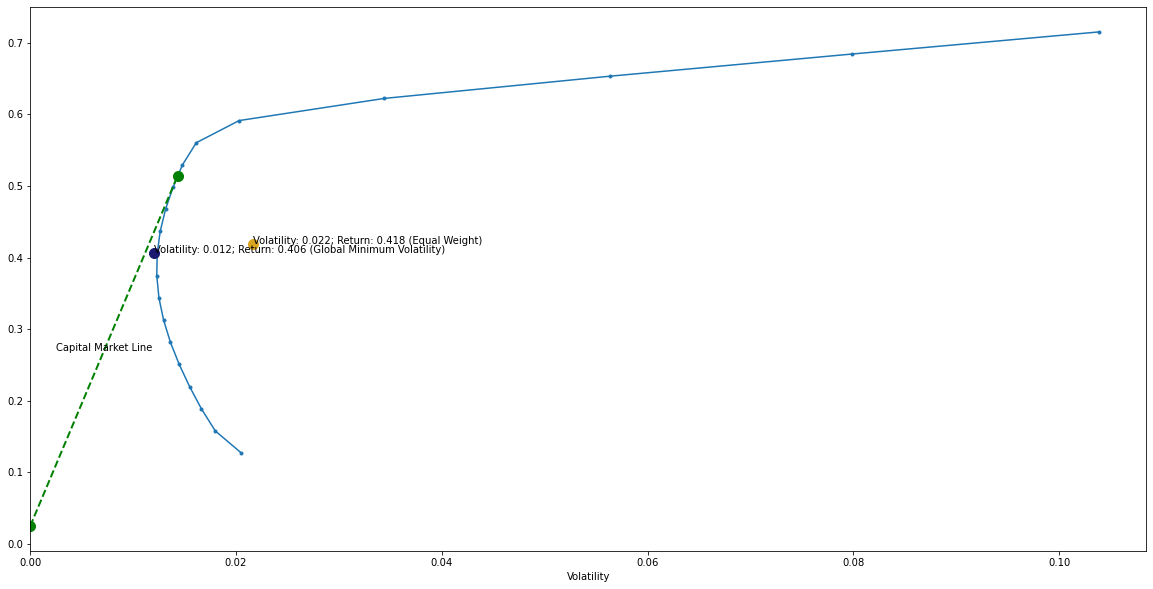

In [8]:
fm.get_portfolio_details(20, annualized_rets, cov_matrix, riskfree_rate=0.025, output_format="plot", show_cml= True, show_ew=True, show_gmv=True)

The table below shows all the portfolios on the efficient frontier with their corresponding levels of expected return and volatility.

In [9]:
portfolios_df = fm.get_portfolio_details(20, annualized_rets, cov_matrix, riskfree_rate=0.025, output_format="dataframe")
portfolios_df

,Returns,Volatility,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P,RENEURON GROUP PLC ORD 1P,COHORT PLC ORD 10P
0,0.127,0.021,0.000,0.000,0.000,0.000,0.000,1.000
1,0.158,0.018,0.000,0.000,0.000,0.091,0.094,0.815
2,0.189,0.017,0.000,0.000,0.064,0.121,0.084,0.732
3,0.220,0.015,0.000,0.053,0.084,0.121,0.076,0.667
4,0.251,0.014,0.000,0.105,0.103,0.120,0.071,0.600
5,0.282,0.014,0.003,0.157,0.122,0.118,0.064,0.536
6,0.313,0.013,0.005,0.208,0.141,0.117,0.057,0.472
7,0.344,0.013,0.008,0.258,0.160,0.117,0.051,0.407
8,0.375,0.012,0.011,0.309,0.178,0.116,0.044,0.342
9,0.406,0.012,0.013,0.360,0.197,0.114,0.038,0.278


Below are the details of the Global Minimum Volatility portfolio.

In [10]:
gmv = fm.get_gmv (portfolios_df, output_format="dataframe")
gmv

,Returns,Volatility,ALIEN METALS LIMITED COM SHS NPV (DI),INSTEM PLC ORD 10P,GAMES WORKSHOP GROUP PLC ORD 5P,DISCOVERIE GROUP PLC ORD 5P,RENEURON GROUP PLC ORD 1P,COHORT PLC ORD 10P
9,0.406,0.012,0.013,0.36,0.197,0.114,0.038,0.278


Graphically, the composition of the Global Minimum Volatility portfolio would look like this:

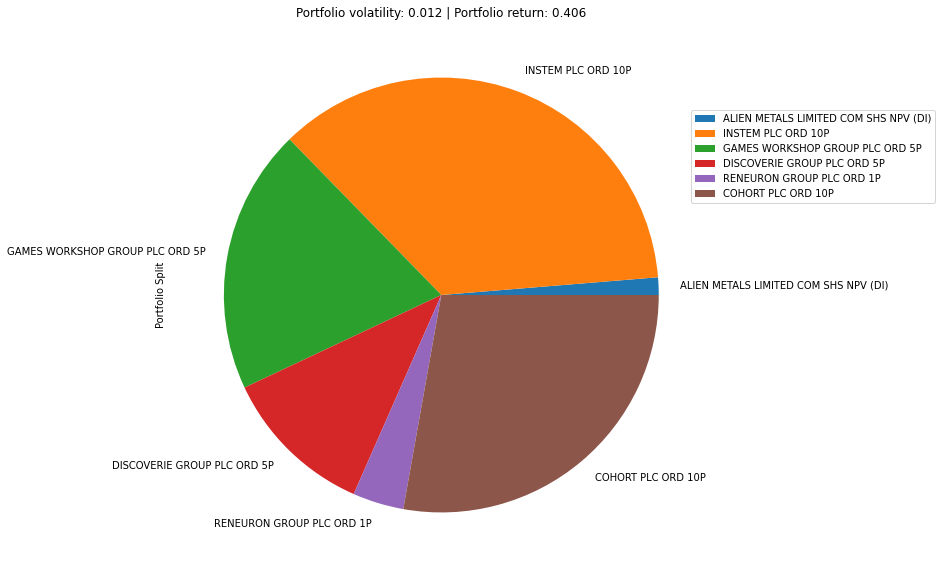

In [11]:
fm.get_gmv (portfolios_df, output_format="piechart")

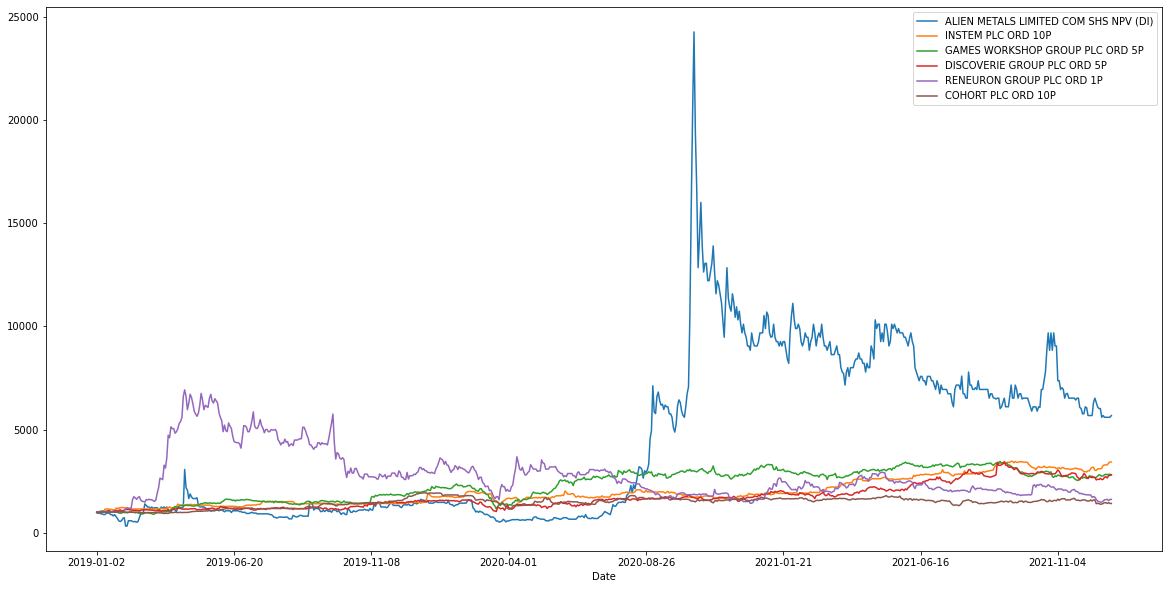

In [12]:
fm.plot_portfolio_value (gmv, returns_multiple, returns_type="raw", rolling_window=30)

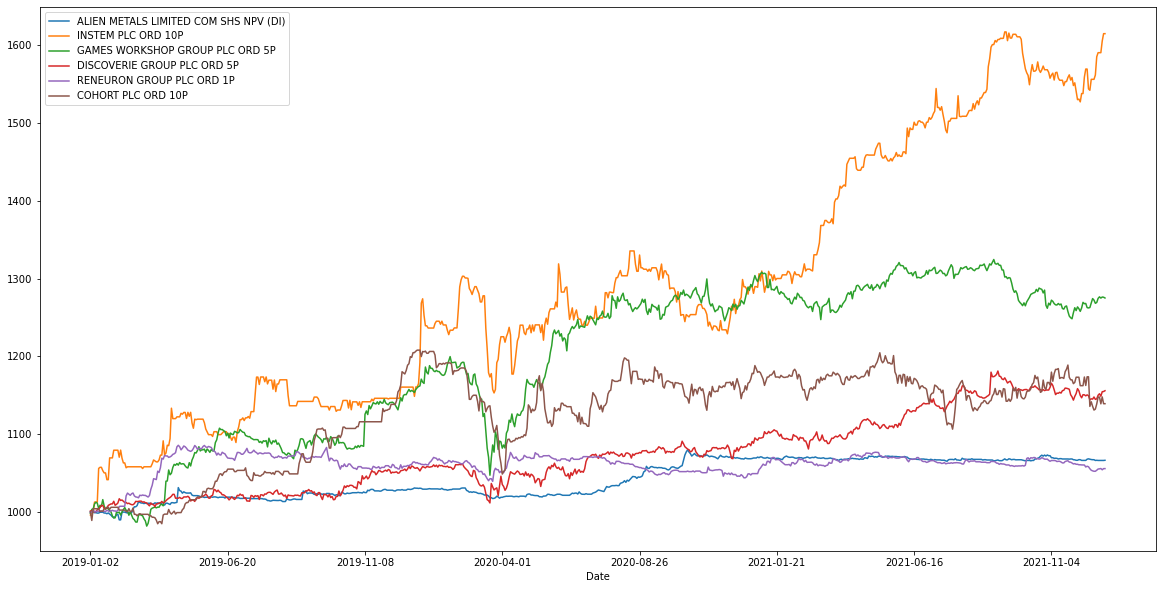

In [13]:
fm.plot_portfolio_value (gmv, returns_multiple, returns_type="weighed", rolling_window=30)

<AxesSubplot:xlabel='Date'>

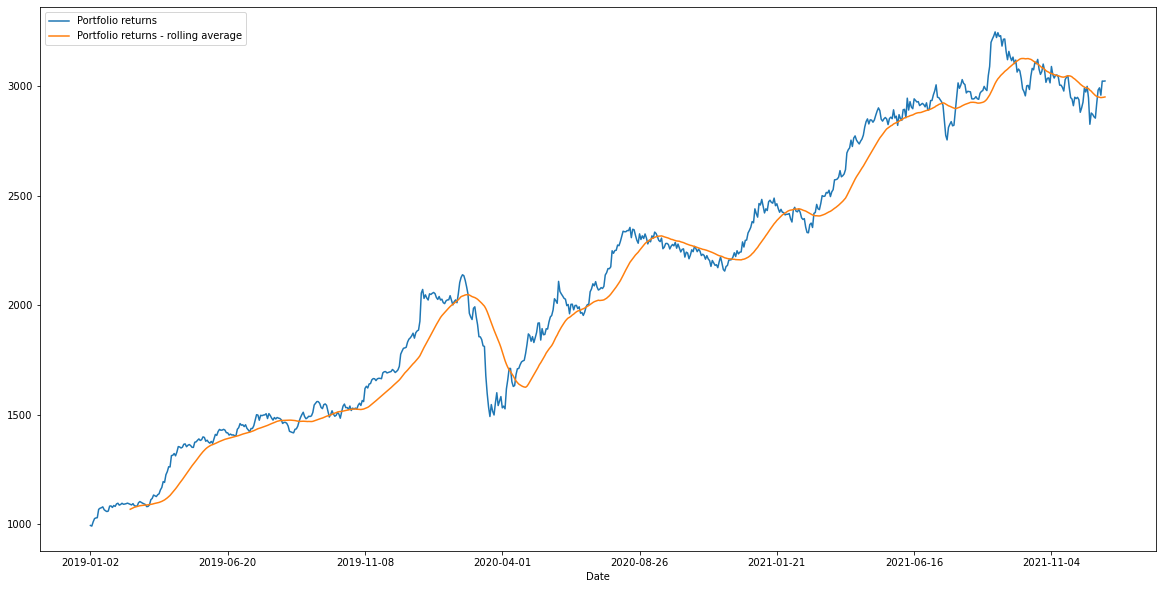

In [14]:
fm.plot_portfolio_value (gmv, returns_multiple, returns_type="total", rolling_window=30)

<AxesSubplot:>

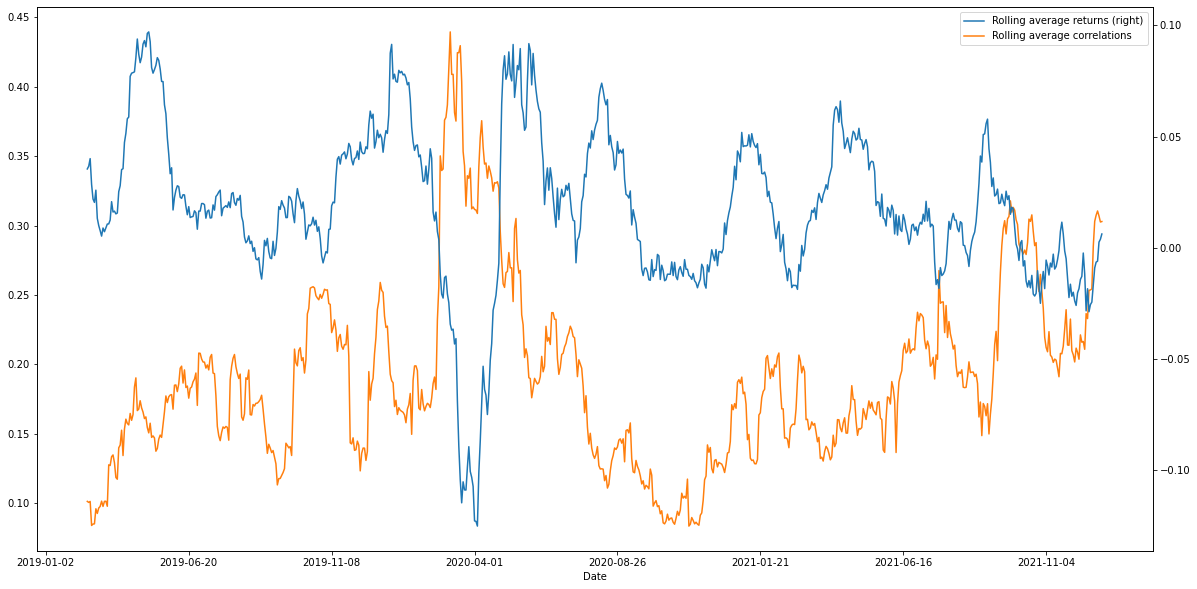

In [15]:
fm.plot_portfolio_returns_and_correlations (gmv, returns_multiple, rolling_window=30)